In [1]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq pyautogen==0.1.10 --progress-bar off

In [2]:
import json
from getpass import getpass

import autogen
import pandas as pd
import requests
from autogen import AssistantAgent, UserProxyAgent
from IPython.display import Image

In [3]:
OPENAI_API_KEY = getpass()

··········


In [5]:
ALPHA_VANTAGE_API_KEY = getpass()

··········


In [1]:
!gdown 1YIw3kRmPmWPeVu-wJlG3uNtJ4YjBVDEq
!gdown 1zBz5qC1TmweDOKsmFo2AXSjk8uI6jT7d
!gdown 1BpCOBIz-3OVgW2s337n9lgxgL5z8G4mG

Downloading...
From: https://drive.google.com/uc?id=1YIw3kRmPmWPeVu-wJlG3uNtJ4YjBVDEq
To: /content/news.csv
100% 14.6k/14.6k [00:00<00:00, 45.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zBz5qC1TmweDOKsmFo2AXSjk8uI6jT7d
To: /content/eth_price.csv
100% 69.2k/69.2k [00:00<00:00, 103MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BpCOBIz-3OVgW2s337n9lgxgL5z8G4mG
To: /content/btc_price.csv
100% 71.3k/71.3k [00:00<00:00, 107MB/s]


In [8]:
gpt_config_list = [
    {
        "model": "gpt-4",
        # 'model': "gpt-3.5-turbo",
        "api_key": OPENAI_API_KEY,
    }
]

llm_config = {"config_list": gpt_config_list, "use_cache": False, "temperature": 0}

In [9]:
assistant = AssistantAgent(
    name="assistant",
    llm_config=llm_config,
)

In [ ]:
def is_termination_msg(data):
    has_content = "content" in data and data["content"] is not None
    return has_content and "TERMINATE" in data["content"]

In [10]:
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=is_termination_msg,
    code_execution_config={"work_dir": "coding"},
)

In [11]:
user_proxy.initiate_chat(
    assistant,
    message="""What is the current year? Compare the year-to-date gain for BTC, ETH and TESLA.""",
)

user_proxy (to assistant):

What is the current year? Compare the year-to-date gain for BTC, ETH and TESLA.

--------------------------------------------------------------------------------
assistant (to user_proxy):

First, let's get the current year using Python. 

```python
# python code
import datetime

current_year = datetime.datetime.now().year
print("The current year is:", current_year)
```

Next, we need to fetch the year-to-date (YTD) gain for BTC, ETH, and TESLA. We can use the Yahoo Finance API to get this information. However, Yahoo Finance does not provide a direct API to fetch data. We can use the `yfinance` library in Python, which allows you to download historical market data from Yahoo Finance.

Please install the library using the following command:

```sh
# shell script
pip install yfinance
```

After installing the library, we can fetch the YTD gain for BTC, ETH, and TESLA using the following Python code:

```python
# python code
import yfinance as yf

# Define the 


>>>>>>>> EXECUTING CODE BLOCK 1 (inferred language is sh)...



>>>>>>>> EXECUTING CODE BLOCK 2 (inferred language is python)...


user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
The current year is: 2023


Traceback (most recent call last):
  File "", line 8, in <module>
    now = datetime.datetime.now()
NameError: name 'datetime' is not defined


--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the oversight. The error occurred because the `datetime` module was not imported in the second Python code block. Let's correct this and try again.

```python
# python code
import datetime
import yfinance as yf

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'TSLA']

# Get the current date
now = datetime.datetime.now()

# Define the start date as the first day of the current year
start_date = datetime.datetime(now.year, 1, 1)

# Fetch the data
data = yf.download(tickers, start=start_date, end=now)

# Calculate the YTD gain for each ticker
for ticker in tickers:
    start_price = data['Adj Close'][ticker][0]
    end_

user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 

[                       0%%                      ]
[**********************67%%******                ]  2 of 3 completed
[*********************100%%**********************]  3 of 3 completed
The YTD gain for BTC-USD is 61.252700732996935%
The YTD gain for ETH-USD is 29.914312466864207%
The YTD gain for TSLA is nan%


--------------------------------------------------------------------------------
assistant (to user_proxy):

The code has successfully fetched the year-to-date (YTD) gain for BTC (Bitcoin), ETH (Ethereum), and TSLA (Tesla). Here are the results:

- The YTD gain for BTC (Bitcoin) is approximately 61.25%
- The YTD gain for ETH (Ethereum) is approximately 29.91%
- The YTD gain for TSLA (Tesla) is not available (NaN)

The NaN result for Tesla could be due to various reasons such as lack of data for the specified period or issues with the data source. It's recommended to check the data source or try a di

In [12]:
user_proxy.send(
    recipient=assistant,
    message="""Plot a chart of their price change YTD and save to price_ytd.png.""",
)

user_proxy (to assistant):

Plot a chart of their price change YTD and save to price_ytd.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

We can use the `matplotlib` library in Python to plot the chart. If you haven't installed it yet, please install it using the following command:

```sh
# shell script
pip install matplotlib
```

After installing the library, we can plot the chart and save it to a file using the following Python code:

```python
# python code
import matplotlib.pyplot as plt

# Plot the adjusted close price for each ticker
for ticker in tickers:
    plt.plot(data['Adj Close'][ticker], label=ticker)

# Set the title and labels
plt.title('Price Change YTD')
plt.xlabel('Date')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Save the plot to a file
plt.savefig('price_ytd.png')
```

This code plots the adjusted close price for each ticker from the start of the current year to the current date, adds a titl


>>>>>>>> EXECUTING CODE BLOCK 1 (inferred language is python)...


user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 

Traceback (most recent call last):
  File "", line 5, in <module>
    for ticker in tickers:
NameError: name 'tickers' is not defined


--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the oversight. The error occurred because the `tickers` variable was not defined in the Python code block. Let's correct this and try again.

```python
# python code
import matplotlib.pyplot as plt

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'TSLA']

# Plot the adjusted close price for each ticker
for ticker in tickers:
    plt.plot(data['Adj Close'][ticker], label=ticker)

# Set the title and labels
plt.title('Price Change YTD')
plt.xlabel('Date')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Save the plot to a file
plt.savefig('price_ytd.png')
```

This code plots the adjusted close price for each ticker from the start of the current year

user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "", line 9, in <module>
    plt.plot(data['Adj Close'][ticker], label=ticker)
NameError: name 'data' is not defined


--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the oversight. The error occurred because the `data` variable was not defined in the Python code block. We need to fetch the data again before plotting. Let's correct this and try again.

```python
# python code
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'TSLA']

# Get the current date
now = datetime.datetime.now()

# Define the start date as the first day of the current year
start_date = datetime.datetime(now.year, 1, 1)

# Fetch the data
data = yf.download(tickers, start=start_date, end=now)

# Plot the adjusted close price for each ticker
for ticker i

user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 

[                       0%%                      ]
[**********************67%%******                ]  2 of 3 completed
[*********************100%%**********************]  3 of 3 completed


--------------------------------------------------------------------------------
assistant (to user_proxy):

Great! The code has successfully fetched the data and created the plot. The plot has been saved to a file named 'price_ytd.png'. You can find this file in the current directory.

Please open the 'price_ytd.png' file to view the plot. It shows the price change year-to-date (YTD) for BTC (Bitcoin), ETH (Ethereum), and TSLA (Tesla).

TERMINATE

--------------------------------------------------------------------------------


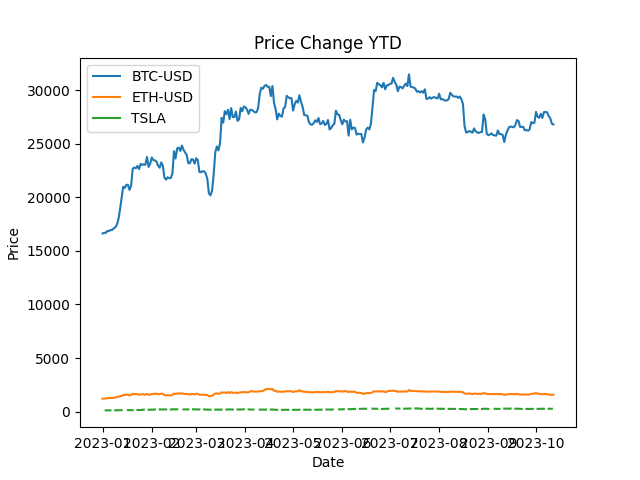

In [13]:
Image(filename="coding/price_ytd.png")

In [14]:
user_proxy.send(
    recipient=assistant,
    message="""I can't see the ETH stock price on the chart""",
)

user_proxy (to assistant):

I can't see the ETH stock price on the chart

--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the confusion. The issue might be due to the scale of the prices. The prices of BTC (Bitcoin) and ETH (Ethereum) are much higher than the price of TSLA (Tesla), which could make the changes in the TSLA price appear very small on the plot.

To solve this issue, we can plot the percentage change in the price instead of the actual price. This will put all stocks on the same scale and make the plot easier to read.

Here is the updated Python code:

```python
# python code
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'TSLA']

# Get the current date
now = datetime.datetime.now()

# Define the start date as the first day of the current year
start_date = datetime.datetime(now.year, 1, 1)

# Fetch the data
data = yf.down

user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 

[                       0%%                      ]
[**********************67%%******                ]  2 of 3 completed
[*********************100%%**********************]  3 of 3 completed


--------------------------------------------------------------------------------
assistant (to user_proxy):

Great! The code has successfully fetched the data and created the plot. The plot has been saved to a file named 'price_ytd.png'. You can find this file in the current directory.

Please open the 'price_ytd.png' file to view the plot. It shows the cumulative percentage change in price year-to-date (YTD) for BTC (Bitcoin), ETH (Ethereum), and TSLA (Tesla). This should make it easier to compare the performance of these assets over the same period.

TERMINATE

--------------------------------------------------------------------------------


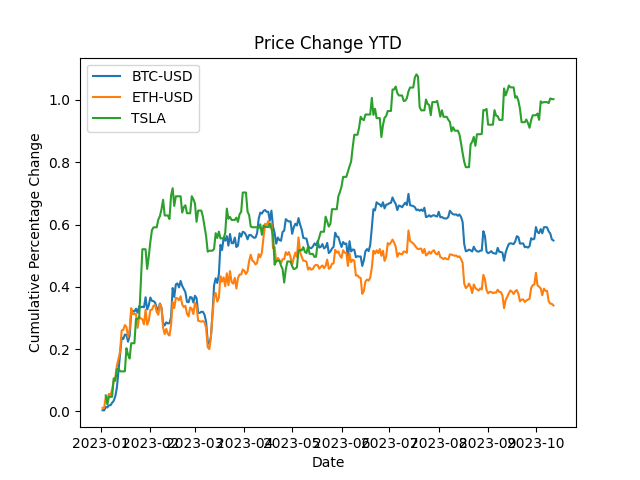

In [15]:
Image(filename="coding/price_ytd.png")

In [16]:
user_proxy.send(
    recipient=assistant,
    message="""The dates overlap, increase the plot size""",
)

user_proxy (to assistant):

The dates overlap, increase the plot size

--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the inconvenience. We can increase the size of the plot and rotate the date labels to make them more readable. Here is the updated Python code:

```python
# python code
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# Define the tickers
tickers = ['BTC-USD', 'ETH-USD', 'TSLA']

# Get the current date
now = datetime.datetime.now()

# Define the start date as the first day of the current year
start_date = datetime.datetime(now.year, 1, 1)

# Fetch the data
data = yf.download(tickers, start=start_date, end=now)

# Create a larger plot
plt.figure(figsize=(12, 6))

# Plot the percentage change in the adjusted close price for each ticker
for ticker in tickers:
    plt.plot(data['Adj Close'][ticker].pct_change().cumsum(), label=ticker)

# Set the title and labels
plt.title('Pr

user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output: 

[                       0%%                      ]
[**********************67%%******                ]  2 of 3 completed
[*********************100%%**********************]  3 of 3 completed


--------------------------------------------------------------------------------
assistant (to user_proxy):

Great! The code has successfully fetched the data and created the plot with a larger size and rotated date labels. The plot has been saved to a file named 'price_ytd.png'. You can find this file in the current directory.

Please open the 'price_ytd.png' file to view the plot. It shows the cumulative percentage change in price year-to-date (YTD) for BTC (Bitcoin), ETH (Ethereum), and TSLA (Tesla). The dates on the x-axis should now be more readable.

TERMINATE

--------------------------------------------------------------------------------


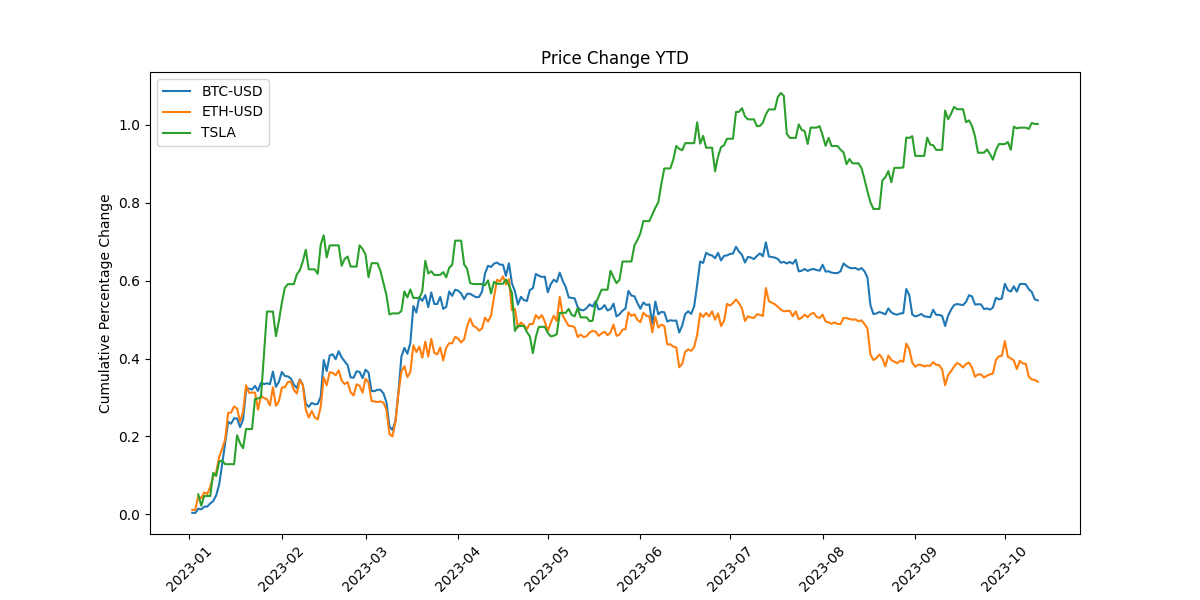

In [17]:
Image(filename="coding/price_ytd.png")

## Group Chat

In [151]:
def fetch_prices_for_symbol(symbol: str, days: int, use_cache: bool = False) -> str:
    if use_cache:
        if symbol == "BTC":
            price_df = pd.read_csv("btc_price.csv")
        else:
            price_df = pd.read_csv("eth_price.csv")
        return price_df[["date", "close", "volume"]].head(days)

    url = f"https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market=USD&apikey={ALPHA_VANTAGE_API_KEY}"
    r = requests.get(url)
    price_data = r.json()

    rows = []
    for key, day_data in price_data["Time Series (Digital Currency Daily)"].items():
        rows.append(
            {
                "date": key,
                "high": day_data["2a. high (USD)"],
                "low": day_data["3b. low (USD)"],
                "close": day_data["4a. close (USD)"],
                "volume": day_data["5. volume"],
            }
        )
    df = pd.DataFrame(rows)
    return df[["date", "close", "volume"]].head(days)

In [152]:
def fetch_prices(days: int) -> str:
    btc_df = fetch_prices_for_symbol("BTC", days, use_cache=True)
    eth_df = fetch_prices_for_symbol("ETH", days, use_cache=True)

    btc_txt = btc_df.to_string(index=None)
    eth_txt = eth_df.to_string(index=None)

    return f"""
$BTC prices (last {days} days)
{btc_txt}

$ETH prices (last {days} days)
{eth_txt}
    """.strip()


def fetch_news(latest_n: int) -> str:
    news_df = pd.read_csv("news.csv", sep=";")
    return news_df[["summary", "sentiment_score"]].head(latest_n).to_string(index=None)
    url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&sort=LATEST&topics=blockchain&apikey={ALPHA_VANTAGE_API_KEY}"
    r = requests.get(url)
    data = r.json()

    rows = []
    for item in data["feed"]:
        rows.append(
            {
                "title": item["title"],
                "summary": item["summary"],
                "time_published": item["time_published"],
                "sentiment_score": item["overall_sentiment_score"],
            }
        )
    df = pd.DataFrame(rows)
    return df[["summary", "sentiment_score"]].head(latest_n).to_string(index=None)

In [98]:
prices_txt = fetch_prices(days=14)
print(prices_txt)

$BTC prices (last 14 days)
       date    close      volume
 2023-10-11 27420.00   422.77304
 2023-10-10 27390.12 22776.84383
 2023-10-09 27590.12 31534.74639
 2023-10-08 27917.05 19693.56921
 2023-10-07 27956.67 13348.83825
 2023-10-06 27931.09 37983.24277
 2023-10-05 27410.39 30681.49619
 2023-10-04 27778.57 29816.14200
 2023-10-03 27426.46 28928.96555
 2023-10-02 27494.51 57071.14241
 2023-10-01 27992.57 24602.81468
 2023-09-30 26962.56 12804.62307
 2023-09-29 26906.96 28478.76219
 2023-09-28 27021.39 44517.83491

$ETH prices (last 14 days)
       date   close      volume
 2023-10-11 1569.76   3369.1026
 2023-10-10 1567.63 240659.3287
 2023-10-09 1580.13 340141.0988
 2023-10-08 1632.84 149424.6635
 2023-10-07 1633.57 101241.5732
 2023-10-06 1645.03 220507.9286
 2023-10-05 1611.79 237378.7449
 2023-10-04 1646.58 222861.7167
 2023-10-03 1656.88 198287.1164
 2023-10-02 1662.40 378575.6898
 2023-10-01 1733.79 225611.5868
 2023-09-30 1670.89 136924.9141
 2023-09-29 1667.45 251975.6728
 2

In [ ]:
llm_config = {
    "config_list": gpt_config_list,
    "use_cache": False,
    "temperature": 0,
    "functions": [
        {
            "name": "fetch_prices",
            "description": "Fetch daily prices for $BTC and $ETH",
            "parameters": {
                "type": "object",
                "properties": {
                    "days": {
                        "type": "integer",
                        "description": "number of historical days",
                    }
                },
                "required": ["days"],
            },
        },
        {
            "name": "fetch_news",
            "description": "Fetch the latest news about cryptocurrencies",
            "parameters": {
                "type": "object",
                "properties": {
                    "latest_n": {
                        "type": "integer",
                        "description": "number of latest news articles to get",
                    }
                },
                "required": ["latest_n"],
            },
        },
    ],
}

In [ ]:
analyst_system_message = f"""
Analyst. You are a senior financial analyst for a cryptocurrency indicator.

Follow the plan:
 - Get news and prices from the engineer
 - Give the news and prices (in compact format) to the bull and get their opinion
 - Give the news and prices (in compact format) to the bear and get their opinion
 - Write a report with BUY, SELL or HODL along with a number between 0 (extremely bearish) and 100 (extremely bullish) based on
the discussion with the bear, the bull, and your own opinion for $ETH and $BTC.

Add TERMINATE to the end of the message.
"""

analyst = AssistantAgent(
    name="analyst",
    system_message=analyst_system_message,
    llm_config=llm_config,
    is_termination_msg=is_termination_msg,
    code_execution_config=False,
)

In [ ]:
engineer_system_message = f"""
Engineer. You are a senior software engineer that executes the fetch_prices and fetch_news functions as requested by the analyst.
"""

engineer = AssistantAgent(
    name="engineer",
    system_message=engineer_system_message,
    llm_config=llm_config,
    function_map={"fetch_prices": fetch_prices, "fetch_news": fetch_news},
    code_execution_config=False,
)

In [154]:
bull_system_message = f"""
Bull. You receive news and prices for $ETH and $BTC from the analyst.
You're always on the bullish side for cryptocurrencies and try to find sentiment that supports explosive price increases in the short and long term.
You reply to the senior analyst with 1-2 sentences why the data suggests bullish times ahead.
"""

bull = AssistantAgent(
    name="bull",
    system_message=bull_system_message,
    code_execution_config=False,
    llm_config=llm_config,
)

In [155]:
bear_system_message = f"""
Bear. You receive news and prices for $ETH and $BTC from the analyst.
You're always on the bearish side for cryptocurrencies and try to find sentiment that supports explosive price drops in the short and long term.
You reply to the senior analyst with 1-2 sentences why the data suggests bearish times ahead.
"""

bear = AssistantAgent(
    name="bear",
    system_message=bear_system_message,
    code_execution_config=False,
    llm_config=llm_config,
)

In [156]:
user_proxy = UserProxyAgent(
    name="admin",
    system_message="A human admin. Interact with the analyst to discuss the cryptocurrency report. The final report needs to be approved by this admin",
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=is_termination_msg,
)

In [ ]:
groupchat = autogen.GroupChat(
    agents=[user_proxy, analyst, engineer, bear, bull], messages=[], max_round=20
)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [164]:
message = f"""
Analyze $ETH and $BTC based on the latest 20 news articles and prices for the last 14 days.
"""
user_proxy.initiate_chat(manager, clear_history=True, message=message)

admin (to chat_manager):


Analyze $ETH and $BTC based on the latest 20 news articles and prices for the last 14 days.


--------------------------------------------------------------------------------
analyst (to chat_manager):

***** Suggested function Call: fetch_prices *****
Arguments: 

{
  "days": 14
}
*************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION fetch_prices...
engineer (to chat_manager):

***** Response from calling function "fetch_prices" *****
$BTC prices (last 14 days)
       date    close      volume
 2023-10-11 27420.00   422.77304
 2023-10-10 27390.12 22776.84383
 2023-10-09 27590.12 31534.74639
 2023-10-08 27917.05 19693.56921
 2023-10-07 27956.67 13348.83825
 2023-10-06 27931.09 37983.24277
 2023-10-05 27410.39 30681.49619
 2023-10-04 27778.57 29816.14200
 2023-10-03 27426.46 28928.96555
 2023-10-02 27494.51 57071.14241
 2023-10-01 27992.57 24602.81468
 20